# Importing Libraries

In [150]:
import pandas as pd
import plotly.express as px
from pyforest import *
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\bishw\OneDrive\Hackathon\Simpl\simpl_payments_bank_digicard_v1.0.csv')

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_columns',500)

<IPython.core.display.Javascript object>

In [4]:
df.shape

(45222, 21)

# Visualizing first 20 rows of data 

In [69]:
df.head(20)

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I
5,3c8fbbaf-cd9d-4e17-8cd4-fc7c01eb9203,Female,1956-01-11,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,0.0,0.0,8.0,0,"93533 Moore Greens\nWest Alicia, NC 34941",frostvictor@west-barron.biz,99.0,NBF,5,NaN,1.0,R
6,27256e97-6bae-4ce6-9b80-58fb66a3d452,Female,2001-12-30,Private,HS-grad,9.0,Never-married,Sales,Own-child,0.0,0.0,24.0,0,90598 Richardson Mountains Apt. 192\nJohnsonfu...,calvin66@hotmail.com,14.0,HFC,5,NaN,1.0,R
7,745b9022-fe0e-4d8e-8056-96f56613260f,Female,1996-12-31,Private,Some-college,10.0,Never-married,Farming-fishing,Not-in-family,0.0,0.0,50.0,0,"28328 Bradley Views Suite 367\nSmithport, AK 5...",bwalker@yahoo.com,13.0,PVT,5,NaN,1.0,R
8,9b56df25-024a-47fe-b895-70317c7b63ce,Male,1977-01-05,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,45.0,0,47303 Sarah Freeway Suite 045\nLake Mariaborou...,rperkins@yahoo.com,10.0,PVT,5,NaN,1.0,R
9,3257eeda-137c-4d8c-a295-b497a3211a48,Female,1963-01-09,State-gov,12th,8.0,Divorced,Other-service,Unmarried,0.0,0.0,40.0,0,"7536 Davis Street Suite 960\nLuisfort, VA 25279",emilymiller@martinez.com,7.0,PVT,5,NaN,1.0,R


In [ ]:
df['age'] = datetime.today().year - pd.DatetimeIndex(df.date_of_birth).year

# Some text cleanup

In [106]:
df.gender = df.gender.str.strip()

In [ ]:
df.workclass = df.workclass.str.strip()

# Looking out for some descriptive stats for numerical cols

## EDA starts here

In [114]:
df[df.approved==0].describe()

,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code,age
count,34014.000000,34014.000000,34014.000000,34014.000000,34014.0,32952.000000,34014.000000,33955.000000,34014.000000
mean,9.630770,149.023402,54.032428,39.372023,0.0,27.202203,84.459252,1.063879,36.929735
std,2.420402,927.447387,312.220461,11.974127,0.0,33.845593,149.080333,0.691044,13.352094
min,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,5.000000,1.000000,18.000000
25%,9.000000,0.000000,0.000000,37.000000,0.0,13.000000,5.000000,1.000000,26.000000
50%,9.000000,0.000000,0.000000,40.000000,0.0,13.000000,5.000000,1.000000,34.000000
75%,10.000000,0.000000,0.000000,40.000000,0.0,16.000000,173.000000,1.000000,46.000000
max,16.000000,41310.000000,4356.000000,99.000000,0.0,99.000000,999.000000,19.000000,90.000000


In [115]:
df[df.approved==1].describe()

,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code,age
count,11208.000000,11208.000000,11208.000000,11208.000000,11208.0,10979.000000,11208.000000,11185.000000,11208.000000
mean,11.598501,3991.791667,193.487063,45.690489,1.0,34.141998,65.688437,1.063299,44.010082
std,2.367451,14616.543746,592.642319,10.797764,0.0,39.220715,126.087579,0.770823,10.332208
min,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,5.000000,1.000000,20.000000
25%,10.000000,0.000000,0.000000,40.000000,1.0,7.000000,5.000000,1.000000,36.000000
50%,12.000000,0.000000,0.000000,40.000000,1.0,13.000000,5.000000,1.000000,43.000000
75%,13.000000,0.000000,0.000000,50.000000,1.0,99.000000,123.000000,1.000000,51.000000
max,16.000000,99999.000000,3683.000000,99.000000,1.0,99.000000,999.000000,19.000000,90.000000


In [71]:
px.histogram(data_frame = df, x = 'capital_gain', facet_col = 'approved', color = 'approved')

<IPython.core.display.Javascript object>

In [74]:
px.histogram(data_frame = df, x = 'capital_loss', facet_col = 'approved', color = 'approved')

<IPython.core.display.Javascript object>

In [75]:
px.histogram(data_frame = df, x = 'hours_per_week', facet_col = 'approved', color = 'approved')

<IPython.core.display.Javascript object>

In [81]:
df.columns

Index(['user_id', 'gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type'],
      dtype='object')

<IPython.core.display.Javascript object>

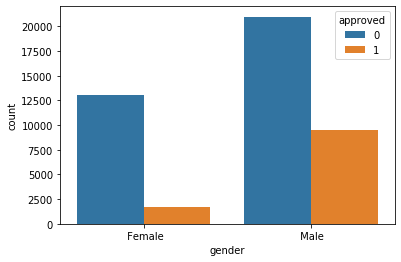

In [91]:
sns.countplot(x = df.gender, data = df, hue = df.approved, )

In [111]:
len(df[(df.gender == 'Male') & (df.approved == 1)])/len(df[(df.gender == 'Female') & (df.approved == 1)])

5.7153984421809465

In [110]:
len(df[(df.gender == 'Male') & (df.approved == 0)])/len(df[(df.gender == 'Female') & (df.approved == 0)])

1.6112390603408568

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

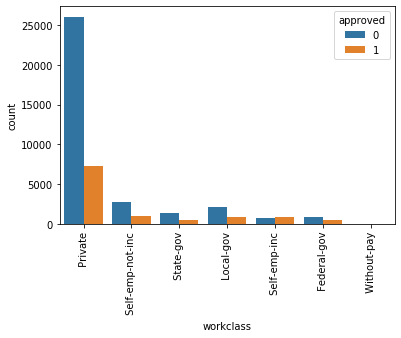

In [93]:
sns.countplot(x = df.workclass, data = df, hue = df.approved)
plt.xticks(rotation = 90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

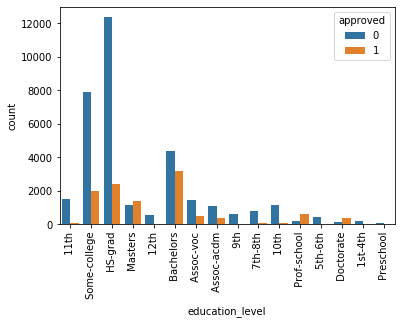

In [94]:
sns.countplot(x = df.education_level, data = df, hue = df.approved)
plt.xticks(rotation = 90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

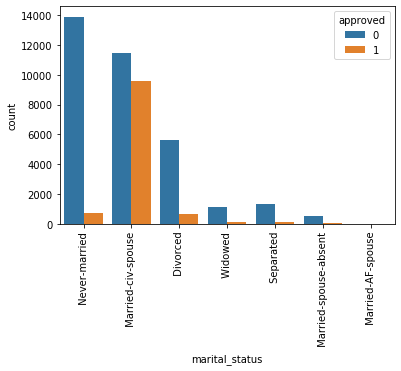

In [95]:
sns.countplot(x = df.marital_status, data = df, hue = df.approved)
plt.xticks(rotation = 90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

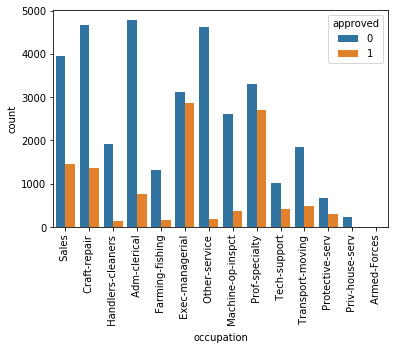

In [96]:
sns.countplot(x = df.occupation, data = df, hue = df.approved)
plt.xticks(rotation = 90)

In [113]:
px.histogram(data_frame = df, x = 'age', facet_col = 'approved', color = 'approved')

<IPython.core.display.Javascript object>

# Some inference

# Data Preprocessing steps starts here

In [116]:
df.columns

Index(['user_id', 'gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type', 'age'],
      dtype='object')

In [8]:
df1 = df.loc[:,['gender', 'date_of_birth', 'workclass',
       'education_num', 'marital_status',
       'capital_gain', 'capital_loss', 'hours_per_week', 'inquiry_purpose_code',
       'asset_class_cd', 'asset_code', 'portfolio_type','approved']]

In [120]:
df1.head(20)

,gender,workclass,education_num,marital_status,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,asset_class_cd,asset_code,portfolio_type,approved,age
0,Female,Employed,7.0,UnMarried,0.0,0.0,17.0,7.0,Default,Individual,Credit,0,33
1,Male,Employed,10.0,Married,0.0,0.0,48.0,13.0,Default,Individual,Credit,0,50
2,Male,Employed,9.0,UnMarried,0.0,0.0,50.0,13.0,Default,Individual,Credit,0,47
3,Female,Employed,7.0,UnMarried,0.0,0.0,15.0,13.0,Default,Individual,Credit,0,19
4,Male,Employed,10.0,Married,0.0,0.0,50.0,13.0,Standard,Individual,Credit,0,34
5,Female,Employed,9.0,UnMarried,0.0,0.0,8.0,99.0,Default,Individual,Credit,0,64
6,Female,Employed,9.0,UnMarried,0.0,0.0,24.0,14.0,Default,Individual,Credit,0,19
7,Female,Employed,10.0,UnMarried,0.0,0.0,50.0,13.0,Default,Individual,Credit,0,24
8,Male,Employed,14.0,Married,0.0,0.0,45.0,10.0,Default,Individual,Credit,0,43
9,Female,Employed,8.0,UnMarried,0.0,0.0,40.0,7.0,Default,Individual,Credit,0,57


# Checking datatype for the newly sliced DataFrame

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                45222 non-null  object 
 1   date_of_birth         45222 non-null  object 
 2   workclass             45222 non-null  object 
 3   education_num         45222 non-null  float64
 4   marital_status        45222 non-null  object 
 5   capital_gain          45222 non-null  float64
 6   capital_loss          45222 non-null  float64
 7   hours_per_week        45222 non-null  float64
 8   inquiry_purpose_code  43931 non-null  float64
 9   asset_class_cd        9492 non-null   object 
 10  asset_code            45140 non-null  float64
 11  portfolio_type        45216 non-null  object 
 12  approved              45222 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 4.5+ MB


In [11]:
df1.date_of_birth = pd.DatetimeIndex(df1.date_of_birth)

<IPython.core.display.Javascript object>

# Creating new feature Age

In [13]:
df1['age'] = datetime.today().year - pd.DatetimeIndex(df1.date_of_birth).year

<IPython.core.display.Javascript object>

In [14]:
df1.workclass = df1.workclass.str.strip()

In [15]:
df1.workclass.unique()

array(['Private', 'Self-emp-not-inc', 'State-gov', 'Local-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay'], dtype=object)

# Bucketizing the workclass, marital status, into two classes to reduce cardinality

In [16]:
workClass = ["UnEmployed" if (i == 'Without-pay')  else "Employed" for i in df1.workclass.values]

In [17]:
df1.workclass = workClass

In [18]:
df1.workclass.unique()

array(['Employed', 'UnEmployed'], dtype=object)

In [19]:
df1.education_num.unique()

array([ 7., 10.,  9., 14.,  8., 13., 11., 12.,  5.,  4.,  6., 15.,  3.,
       16.,  2.,  1.])

In [20]:
df1.marital_status = df1.marital_status.str.strip()

In [21]:
df1.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [22]:
df1.marital_status = ["Married" if i.split('-')[0] == 'Married' else 'UnMarried' for i in df1.marital_status.values]

# Expanding the unique ids for categorical columns with values from dictionary provieded in the pdf. This will be used for hasing these text features

In [23]:
df1.asset_class_cd.unique()

array([nan, 'S', 'D', '?', 'L', 'B', 'M', '-1', '01'], dtype=object)

In [24]:
df1 = df1[df1.asset_class_cd!='01']

In [25]:
df1.asset_class_cd.fillna('Default', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df1.asset_class_cd = df1.asset_class_cd.map({np.nan:'Default','S':'Standard','B':'Substandard','D':'Doubtful','L':'Loss','M':'SpecialAccount','-1':'Default','?':'Unknown'})

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df1.asset_class_cd.fillna('Default', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df1.asset_class_cd.unique()

array(['Default', 'Standard', 'Doubtful', 'Unknown', 'Loss',
       'Substandard', 'SpecialAccount'], dtype=object)

In [30]:
df1.asset_code.unique()

array([ 1.,  4.,  2., 19., nan])

In [31]:
df1 = df1[df1.asset_code.isna()!=True]

In [32]:
df1.asset_code = df1.asset_code.map({1:'Individual',2:'Joint',4:'Guarantor',19:'AuthorizedUser',20:'Deceased'})

In [33]:
df1.portfolio_type.unique()

array(['R', 'I', 'M', nan, 'F'], dtype=object)

In [34]:
df1 = df1[df1.portfolio_type.isna()!=True]

# Bucketizing the portfolio_type into three classes to reduce cardinality

In [35]:
df1.portfolio_type = ['Credit' if i in ('R','I','S') else 'Loan' if i in ('L','M','X') else 'Banking' for i in df1.portfolio_type]

In [38]:
df1.drop(columns = ['date_of_birth'], inplace = True)

In [41]:
df1.dropna(inplace =True)

# Data ready for ML

In [121]:
df1.head(15)

,gender,workclass,education_num,marital_status,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,asset_class_cd,asset_code,portfolio_type,approved,age
0,Female,Employed,7.0,UnMarried,0.0,0.0,17.0,7.0,Default,Individual,Credit,0,33
1,Male,Employed,10.0,Married,0.0,0.0,48.0,13.0,Default,Individual,Credit,0,50
2,Male,Employed,9.0,UnMarried,0.0,0.0,50.0,13.0,Default,Individual,Credit,0,47
3,Female,Employed,7.0,UnMarried,0.0,0.0,15.0,13.0,Default,Individual,Credit,0,19
4,Male,Employed,10.0,Married,0.0,0.0,50.0,13.0,Standard,Individual,Credit,0,34
5,Female,Employed,9.0,UnMarried,0.0,0.0,8.0,99.0,Default,Individual,Credit,0,64
6,Female,Employed,9.0,UnMarried,0.0,0.0,24.0,14.0,Default,Individual,Credit,0,19
7,Female,Employed,10.0,UnMarried,0.0,0.0,50.0,13.0,Default,Individual,Credit,0,24
8,Male,Employed,14.0,Married,0.0,0.0,45.0,10.0,Default,Individual,Credit,0,43
9,Female,Employed,8.0,UnMarried,0.0,0.0,40.0,7.0,Default,Individual,Credit,0,57


# Train test split and Machine Learning using Logistic Regression (GLM)

In [43]:
X = df1.loc[:,['gender', 'workclass', 'education_num', 'marital_status',
       'capital_gain', 'capital_loss', 'hours_per_week',
       'inquiry_purpose_code', 'asset_class_cd', 'asset_code',
       'portfolio_type', 'age']]
y = df1.loc[:,'approved']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Making a UDF to hash all the categorical columns

In [46]:
def hasher(nunique, train_col, test_col):
    hs = HashingVectorizer(n_features=nunique, norm=None, alternate_sign=False)
#     return hs.transform(col).toarray()
    return hs.transform(train_col), hs.transform(test_col)

In [47]:
X_train_gender, X_test_gender = hasher(df1.gender.nunique(), X_train.gender, X_test.gender)

In [48]:
X_train_workclass, X_test_workclass = hasher(df1.workclass.nunique(), X_train.workclass, X_test.workclass)

In [49]:
X_train_marital_status, X_test_marital_status = hasher(df1.marital_status.nunique(), X_train.marital_status, X_test.marital_status)

In [50]:
X_train_asset_class_cd, X_test_asset_class_cd = hasher(df1.asset_class_cd.nunique(), X_train.asset_class_cd, X_test.asset_class_cd)

In [51]:
X_train_asset_code, X_test_asset_code = hasher(df1.asset_code.nunique(), X_train.asset_code, X_test.asset_code)

In [52]:
X_train_portfolio_type, X_test_portfolio_type = hasher(df1.portfolio_type.nunique(), X_train.portfolio_type, X_test.portfolio_type)

In [54]:
train_vec = hstack([X_train_gender, X_train_workclass, X_train_marital_status, X_train_asset_class_cd, X_train_asset_code, X_train_portfolio_type, csr_matrix(X_train.iloc[:,[2,4,5,6,7,11]])])

In [55]:
test_vec = hstack([X_test_gender, X_test_workclass, X_test_marital_status, X_test_asset_class_cd, X_test_asset_code, X_test_portfolio_type, csr_matrix(X_test.iloc[:,[2,4,5,6,7,11]])])

# Training and Testing

In [144]:
mmx = MaxAbsScaler()

In [145]:
mmx.fit(train_vec)

MaxAbsScaler()

In [132]:
skld_train_vec = mmx.transform(train_vec)

In [133]:
skld_test_vec = mmx.transform(test_vec)

## Creating a base line model without Cross Validation

In [58]:
lg = LogisticRegression()

In [59]:
lg.fit(train_vec,y_train)

C:\Users\bishw\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, lg.predict(test_vec)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     10886
           1       0.70      0.48      0.57      3582

    accuracy                           0.82     14468
   macro avg       0.77      0.71      0.73     14468
weighted avg       0.81      0.82      0.81     14468



In [134]:
lg.fit(skld_train_vec,y_train)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, lg.predict(skld_test_vec)))

C:\Users\bishw\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10886
           1       0.72      0.56      0.63      3582

    accuracy                           0.84     14468
   macro avg       0.79      0.75      0.76     14468
weighted avg       0.83      0.84      0.83     14468



# Here we should focus in precision rather than recall as we want our model to correcly predict approved or not rather with high confidence as Precision = TP/(TP+FP). We do not want our model to reject a CC who actually qualifies and vice versa

# Hyperparameter tuning Logistic Regression

In [63]:
gdcv_lg = GridSearchCV(estimator=lg, param_grid={'C':np.logspace(-4, 4, 20), 'solver':['newton-cg', 'lbfgs','saga','liblinear'], 'penalty' : ['l1','l2']}, scoring='precision', n_jobs=-1, cv=3, verbose=1)

<IPython.core.display.Javascript object>

In [64]:
gdcv_lg.fit(train_vec, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear']},
             scoring='precision', verbose=1)

# Getting good precision after hyperparameter tuning

### We have a 11% increase in precison which is desirable

In [65]:
print(classification_report(y_test, gdcv_lg.predict(test_vec)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     10886
           1       0.78      0.31      0.44      3582

    accuracy                           0.81     14468
   macro avg       0.80      0.64      0.66     14468
weighted avg       0.80      0.81      0.78     14468



### Confusion Matrix shows misclassification by the model

In [125]:
cm = pd.DataFrame(confusion_matrix(y_test, gdcv_lg.predict(test_vec)))
cm

<IPython.core.display.Javascript object>

,0,1
0,10578,308
1,2470,1112


<IPython.core.display.Javascript object>

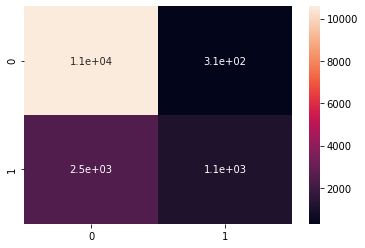

In [68]:
sns.heatmap(confusion_matrix(y_test, gdcv_lg.predict(test_vec)), annot = True)

# Trying on scaled data

In [135]:
gdcv_lg.fit(skld_train_vec, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.1min finished
C:\Users\bishw\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear']},
             scoring='precision', verbose=1)

# Here we saw a 2% increase in precision with scaling 

In [147]:
print(classification_report(y_test, gdcv_lg.predict(skld_test_vec)))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     10886
           1       0.80      0.15      0.25      3582

    accuracy                           0.78     14468
   macro avg       0.79      0.57      0.56     14468
weighted avg       0.78      0.78      0.72     14468



In [140]:
cm = pd.DataFrame(confusion_matrix(y_test, gdcv_lg.predict(skld_test_vec)))
cm

<IPython.core.display.Javascript object>

,0,1
0,10751,135
1,3041,541


<IPython.core.display.Javascript object>

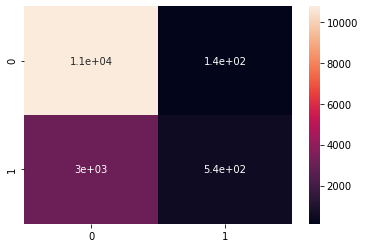

In [141]:
sns.heatmap(confusion_matrix(y_test, gdcv_lg.predict(skld_test_vec)), annot = True)

# In order to determine Credit Limit we typical go for Supervised Algorithms but since we do not have any historical data for the same hence going for Unsupervised Alogorithm which is K-Means in this case.

### Filtering the dataframe for those who have got their CC approved

In [185]:
approved_df = df1[df1.approved == 1]

### Some preprocessing 

In [186]:
def hasher(nunique, col):
    hs = HashingVectorizer(n_features=nunique, norm=None, alternate_sign=False)
#     return hs.transform(col).toarray()
    return hs.transform(col)

In [189]:
app_gen = hasher(approved_df.gender.nunique(),approved_df.gender)
app_workclass = hasher(approved_df.workclass.nunique(),approved_df.workclass)
app_marital_status = hasher(approved_df.marital_status.nunique(),approved_df.marital_status)
app_asset_class_cd = hasher(approved_df.asset_class_cd.nunique(),approved_df.asset_class_cd)
app_asset_code = hasher(approved_df.asset_code.nunique(),approved_df.asset_code)
app_portfolio_type = hasher(approved_df.portfolio_type.nunique(),approved_df.portfolio_type)

In [193]:
approved_vec = hstack([app_gen, app_workclass, app_marital_status, app_asset_class_cd, app_asset_code, app_portfolio_type, csr_matrix(approved_df.iloc[:,[2,4,5,6,7,11]])])

### Applying K-Means algorithm and we are selecting 3 clusters assuming that we will have 'High Credit Limit <8000$ - 6000$>', 'Medium Credit Limit <5000$-3000$>' and 'Low Credit Limit <2000$-1000$>'

In [234]:
km = KMeans(n_clusters = 3)

In [235]:
km.fit(approved_vec)

KMeans(n_clusters=3)

In [236]:
approved_df['creditLimit'] = km.predict(approved_vec)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### These people should be given higher credit limit as their capital gain is much more as compared to other groups and hence might be able to bear the high CC expences. Also these people are highly educated and have worked more hours than their counterparts

In [237]:
approved_df.loc[approved_df.creditLimit==1,:].describe()

,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,approved,age,creditLimit
count,229.000000,229.0,229.0,229.000000,229.000000,229.0,229.000000,229.0
mean,13.087336,99999.0,0.0,50.877729,20.947598,1.0,46.489083,1.0
std,2.497589,0.0,0.0,12.733534,31.632440,0.0,10.552547,0.0
min,3.000000,99999.0,0.0,20.000000,2.000000,1.0,22.000000,1.0
25%,13.000000,99999.0,0.0,40.000000,7.000000,1.0,40.000000,1.0
50%,14.000000,99999.0,0.0,50.000000,7.000000,1.0,47.000000,1.0
75%,15.000000,99999.0,0.0,60.000000,13.000000,1.0,52.000000,1.0
max,16.000000,99999.0,0.0,99.000000,99.000000,1.0,80.000000,1.0


### These people should be given medium credit limit as their capital gain is less as compared to the above but more than the remaning group and hence might be able to bear the medium CC expences. These people are slightly less educated and have worked slightly less hours than the above group

In [228]:
approved_df.loc[approved_df.creditLimit==2,:].describe()

,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,approved,age,creditLimit
count,1672.000000,1672.000000,1672.0,1672.000000,1672.000000,1672.0,1672.000000,1672.0
mean,11.988038,11626.842703,0.0,45.909091,35.830742,1.0,45.594498,2.0
std,2.329495,4967.049778,0.0,10.590472,40.559427,0.0,11.301247,0.0
min,1.000000,6097.000000,0.0,2.000000,1.000000,1.0,20.000000,2.0
25%,10.000000,7688.000000,0.0,40.000000,7.000000,1.0,37.000000,2.0
50%,13.000000,9386.000000,0.0,45.000000,13.000000,1.0,44.000000,2.0
75%,14.000000,15024.000000,0.0,50.000000,99.000000,1.0,52.000000,2.0
max,16.000000,27828.000000,0.0,99.000000,99.000000,1.0,90.000000,2.0


### These people should be given lower credit limit as their capital gain is much less and  capital loss is more as compared to the above groups and hence might be able to bear the low CC expences

In [227]:
approved_df.loc[approved_df.creditLimit==0,:].describe()

,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,approved,age,creditLimit
count,9053.000000,9053.000000,9053.000000,9053.000000,9053.000000,9053.0,9053.000000,9053.0
mean,11.484480,195.207776,235.094002,45.509776,34.182370,1.0,43.666078,0.0
std,2.353838,913.690403,645.915970,10.744617,39.090259,0.0,10.096406,0.0
min,2.000000,0.000000,0.000000,1.000000,1.000000,1.0,20.000000,0.0
25%,9.000000,0.000000,0.000000,40.000000,7.000000,1.0,36.000000,0.0
50%,12.000000,0.000000,0.000000,40.000000,13.000000,1.0,43.000000,0.0
75%,13.000000,0.000000,0.000000,50.000000,99.000000,1.0,50.000000,0.0
max,16.000000,5556.000000,3683.000000,99.000000,99.000000,1.0,90.000000,0.0


In [239]:
approved_df.creditLimit = approved_df.creditLimit.map({1:'High Credit Limit <8000 −6000 >', 2:'Medium Credit Limit <5000 −3000 >', 0:'Low Credit Limit <2000 −1000 >'})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
approved_df.tail(np.random.randint(100,4500))

<IPython.core.display.Javascript object>

,gender,workclass,education_num,marital_status,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,asset_class_cd,asset_code,portfolio_type,approved,age,creditLimit
41397,Male,Employed,13.0,Married,0.0,1977.0,50.0,7.0,Default,Individual,Credit,1,43,Low Credit Limit <2000 −1000 >
41398,Female,Employed,16.0,UnMarried,0.0,0.0,40.0,13.0,Default,Individual,Credit,1,41,Low Credit Limit <2000 −1000 >
41399,Male,Employed,15.0,Married,0.0,0.0,60.0,14.0,Standard,Individual,Credit,1,51,Low Credit Limit <2000 −1000 >
41400,Male,Employed,10.0,Married,0.0,0.0,40.0,7.0,Default,Guarantor,Credit,1,39,Low Credit Limit <2000 −1000 >
41401,Male,Employed,13.0,Married,0.0,0.0,40.0,7.0,Default,Individual,Credit,1,37,Low Credit Limit <2000 −1000 >
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,Male,Employed,15.0,Married,99999.0,0.0,60.0,7.0,Default,Individual,Credit,1,44,High Credit Limit <8000 −6000 >
45218,Male,Employed,15.0,Married,99999.0,0.0,40.0,7.0,Default,Individual,Credit,1,43,High Credit Limit <8000 −6000 >
45219,Male,Employed,15.0,Married,99999.0,0.0,45.0,13.0,Default,Individual,Credit,1,56,High Credit Limit <8000 −6000 >
45220,Male,Employed,13.0,Married,99999.0,0.0,40.0,7.0,Default,Individual,Credit,1,41,High Credit Limit <8000 −6000 >


# END OF PROJECT####